# Practical Traffic Analysis Attacks on Secure Messaging Applications.

In this task, we're delving into the world of "Practical Traffic Analysis Attacks on Secure Messaging Applications." While secure messaging keeps our communication encrypted, it's not entirely safe from evolving threats. Unlike regular attacks, traffic analysis sneaks through patterns and network timing to uncover sensitive info.

These attacks are tricky, as they focus on the core of secure messaging. By studying traffic patterns, bad actors can figure out how often people talk, their interactions, and even get hints about what's being said. Our investigation checks out different parts of traffic analysis, like pulling out metadata, checking message lengths, looking at when data packets move, finding connections in traffic, and even profiling users.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def display(file_name):
    # Load the data from the CSV file
    data = pd.read_csv(file_name)
    data = data[data['Info'] == 'Application Data']
    # Calculate the inter-message delays
    data['Delay'] = data['Time'].diff()

    # Set up a consistent color palette
    color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot the inter-message delays
    plt.figure(figsize=(15, 5))
    plt.plot(data['Delay'], color=color_palette[0])
    plt.title('Inter-Message Delays', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Delay (s)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the message sizes
    plt.figure(figsize=(15, 4))
    plt.plot(data['Length'], color=color_palette[1])
    plt.title('Message Sizes', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the packet length as a function of time
    plt.figure(figsize=(15, 4))
    plt.bar(data['Time'], data['Length'], color=color_palette[2])
    plt.title('Packet Length as a Function of Time', fontsize=16)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the PDF as a function of inter-message delays in a new color
    plt.figure(figsize=(15, 4))
    plt.hist(data['Delay'].dropna(), bins=50, density=True, color=color_palette[3], alpha=0.7)
    plt.title('PDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate the CDF of inter-message delays
    delay_values = data['Delay'].dropna().values
    delay_values.sort()
    cdf = np.arange(1, len(delay_values) + 1) / len(delay_values)

    # Plot the CDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, cdf, color=color_palette[1])
    plt.title('CDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
     # Calculate the CCDF values
    ccdf = 1 - cdf

    # Plot the CCDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, ccdf, color='black')  # Set color to black
    plt.title('CCDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Complementary Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return data

# Using Messages

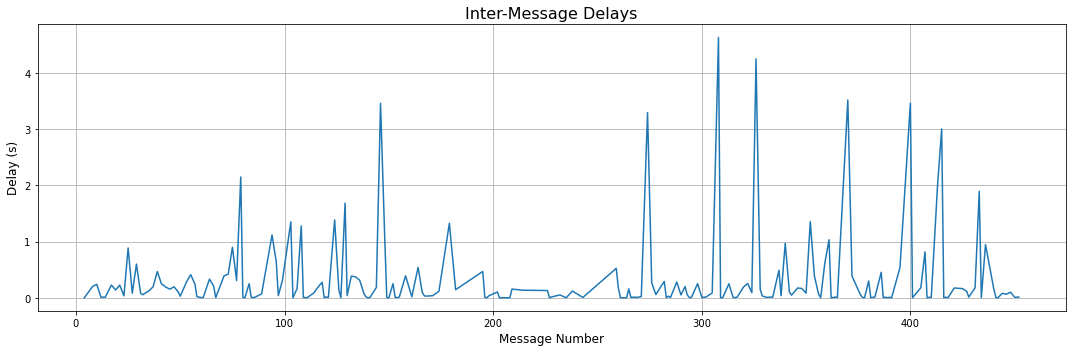

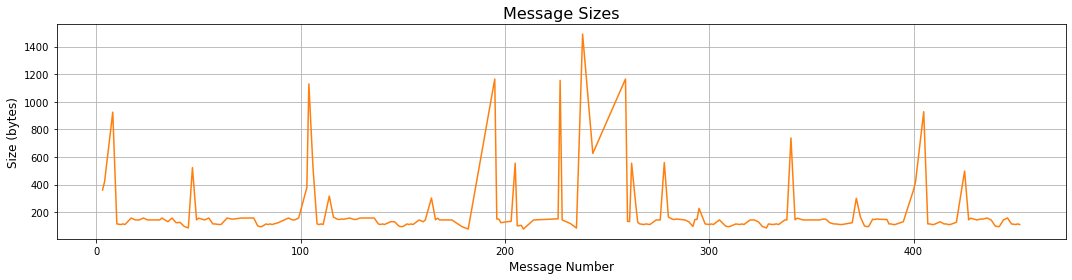

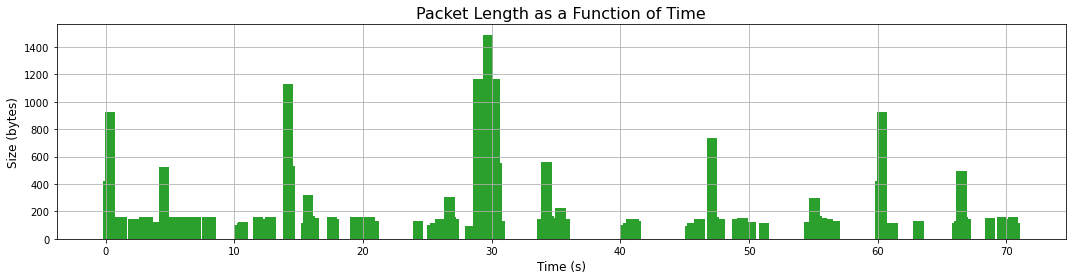

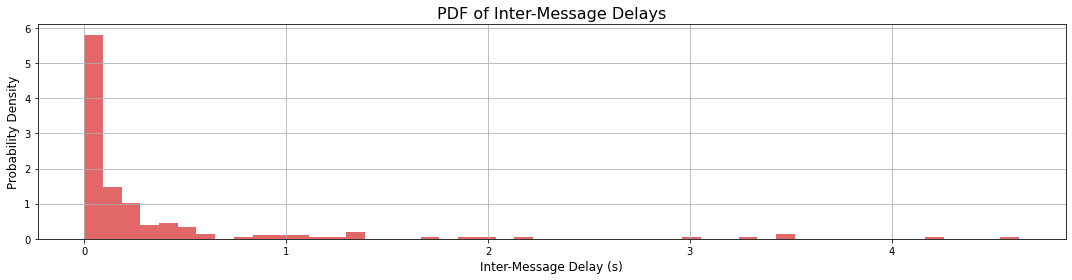

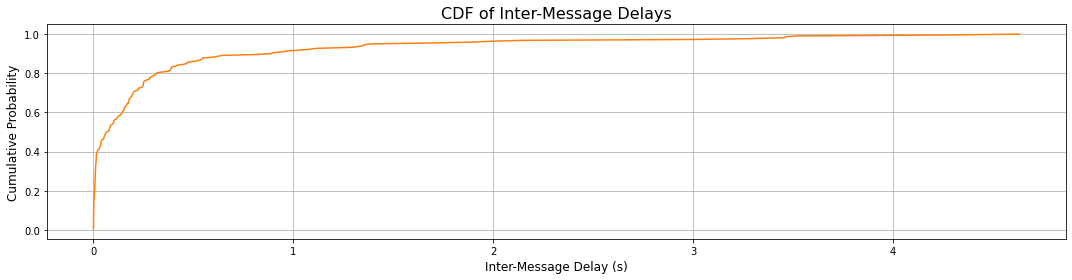

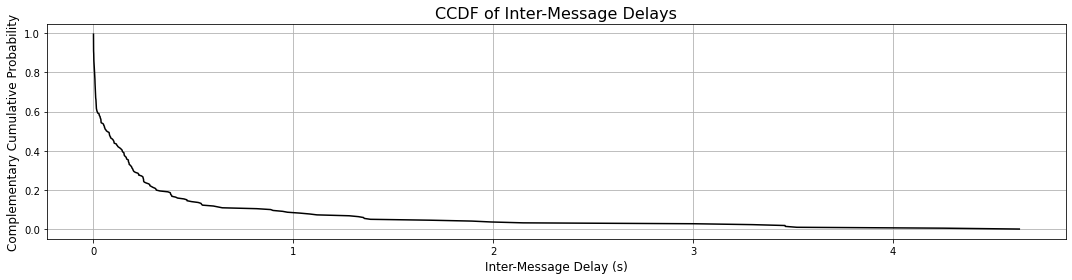

In [16]:
data = display('normalTextRecording.csv')

### More statistical information about the data

In [17]:
data.describe()

,No.,Time,Length,Delay
count,222.000000,222.000000,222.000000,221.000000
mean,8526.319820,32.340212,186.189189,0.318896
std,6178.702639,20.745509,199.188172,0.712707
min,39.000000,0.154735,78.000000,0.000000
25%,3016.500000,15.616326,112.000000,0.007633
50%,7346.500000,29.667105,144.000000,0.069654
75%,13498.250000,48.712742,151.000000,0.250453
max,20473.000000,70.630780,1490.000000,4.630704


# Using Images

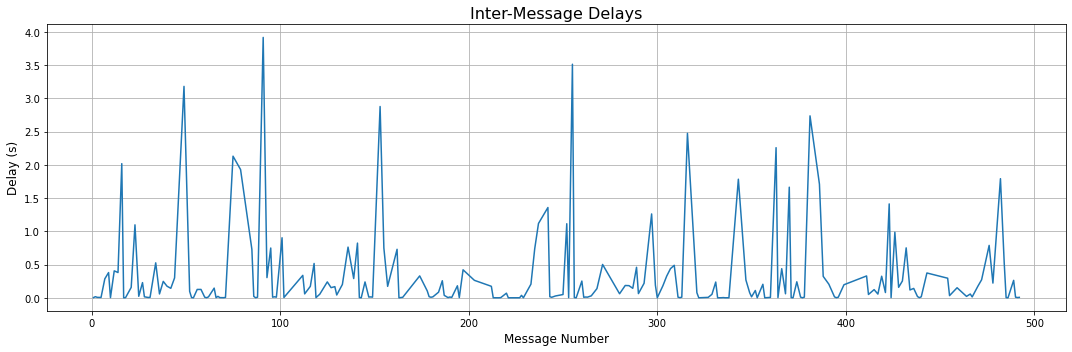

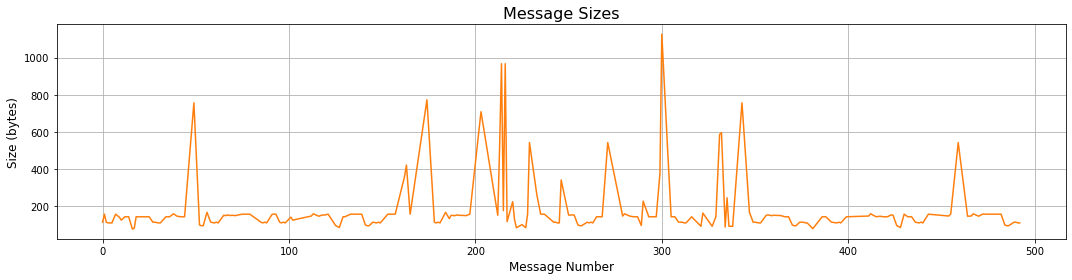

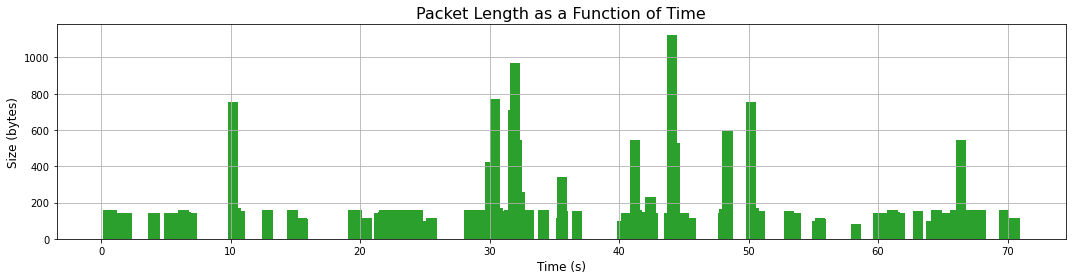

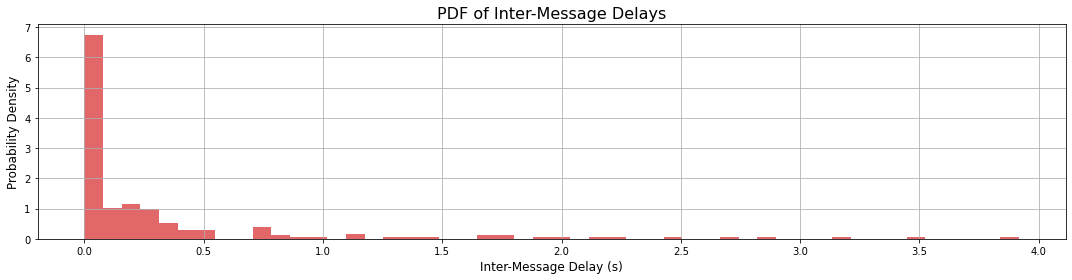

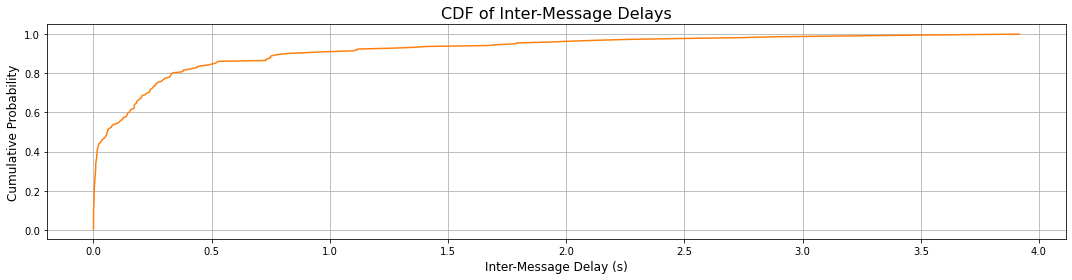

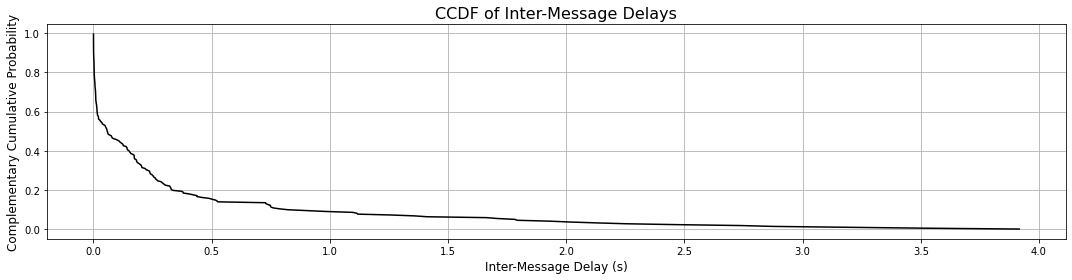

In [18]:
data = display('imageRecording.csv')

In [19]:
data.describe()

,No.,Time,Length,Delay
count,224.000000,224.000000,224.000000,223.000000
mean,10717.857143,36.218733,173.004464,0.314036
std,6116.528826,20.281496,152.313210,0.632738
min,131.000000,0.515013,78.000000,0.000000
25%,5755.750000,21.835451,111.000000,0.005833
50%,10775.000000,34.838299,144.000000,0.058603
75%,15032.500000,50.854771,158.000000,0.269528
max,21411.000000,70.545108,1126.000000,3.916707


# Using Voice Messages

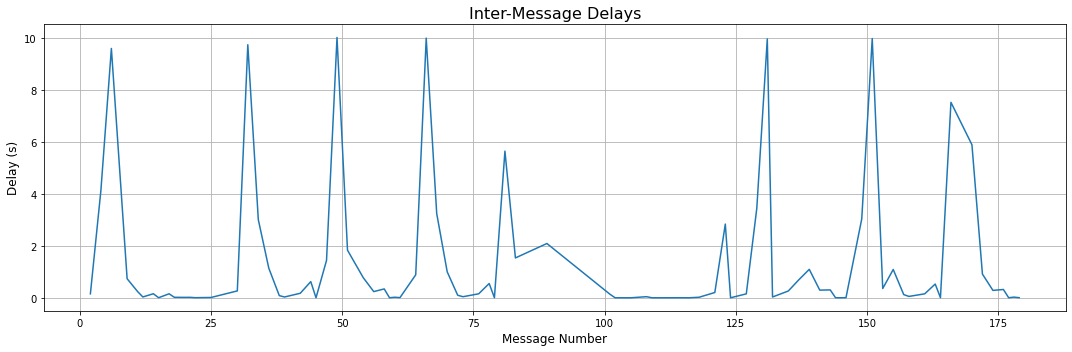

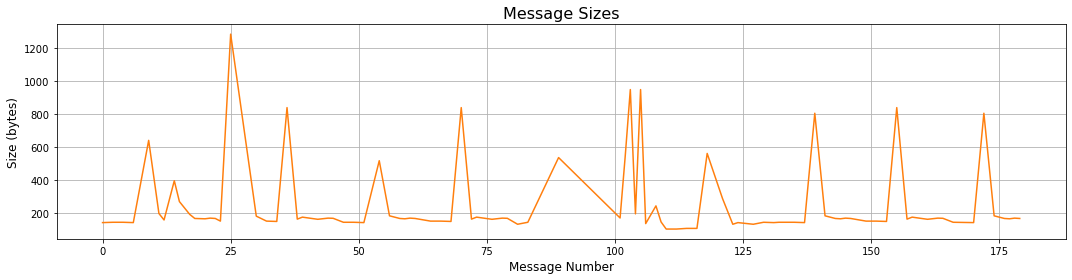

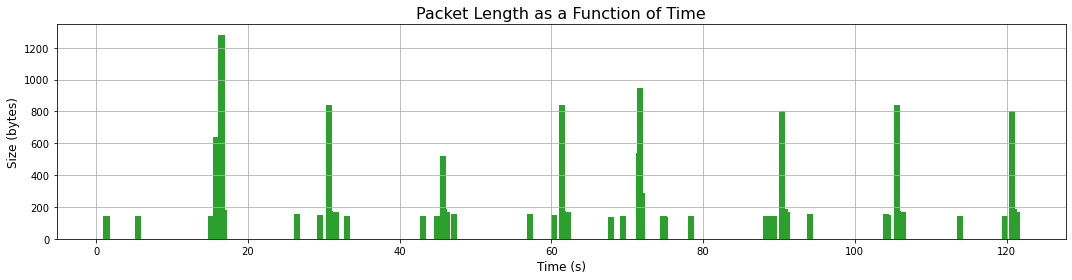

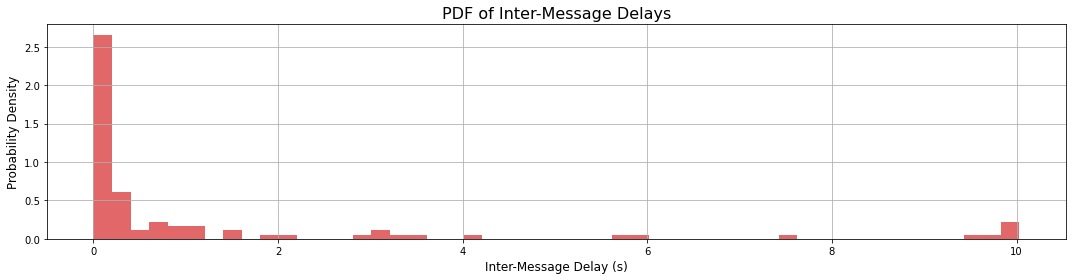

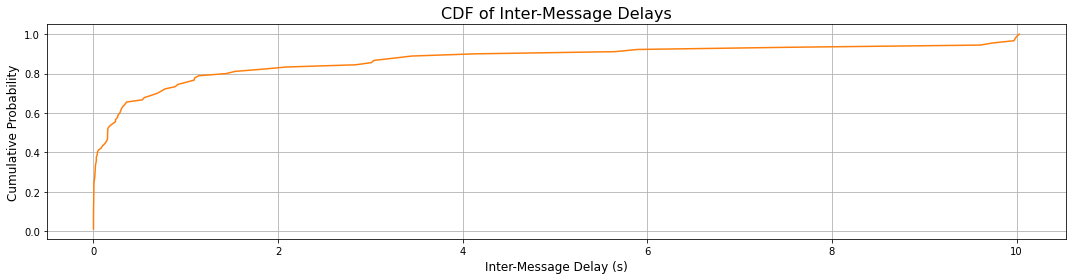

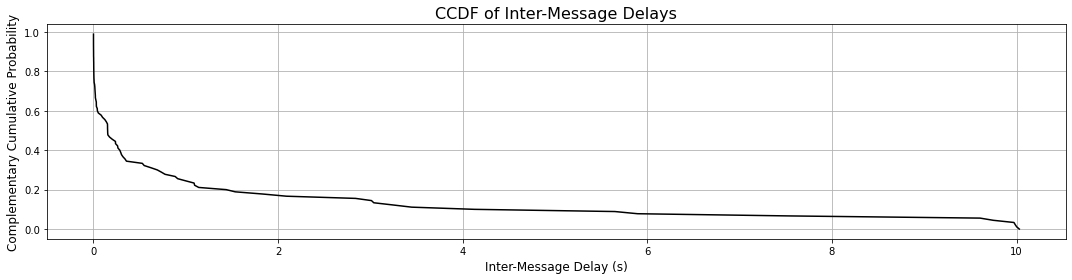

In [20]:
data = display('voiceRecording.csv')

In [21]:
data.describe()

,No.,Time,Length,Delay
count,91.000000,91.000000,91.000000,90.000000
mean,1040.307692,62.925833,253.010989,1.334302
std,494.102322,34.049676,232.417034,2.677273
min,10.000000,1.250469,105.000000,0.000000
25%,714.000000,31.285896,146.000000,0.008156
50%,1132.000000,71.525713,169.000000,0.153450
75%,1450.500000,89.885845,184.000000,0.977956
max,1852.000000,121.337675,1283.000000,10.028456


# Using Videos

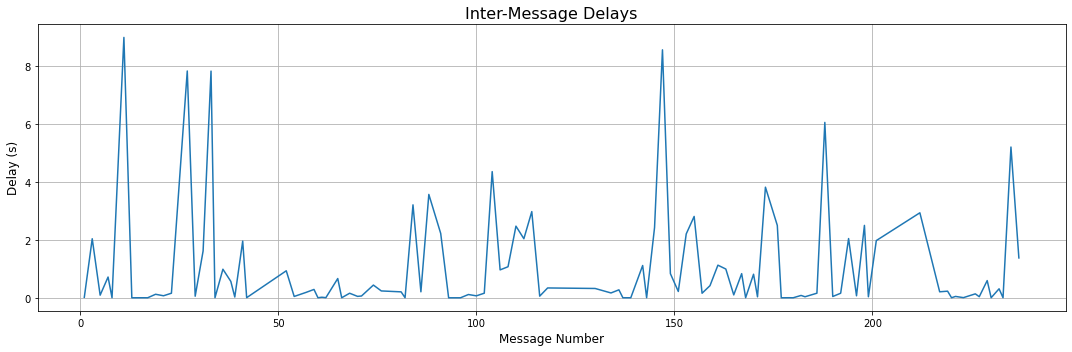

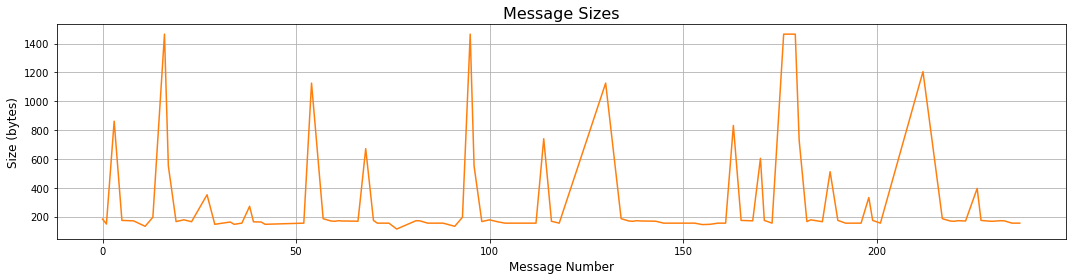

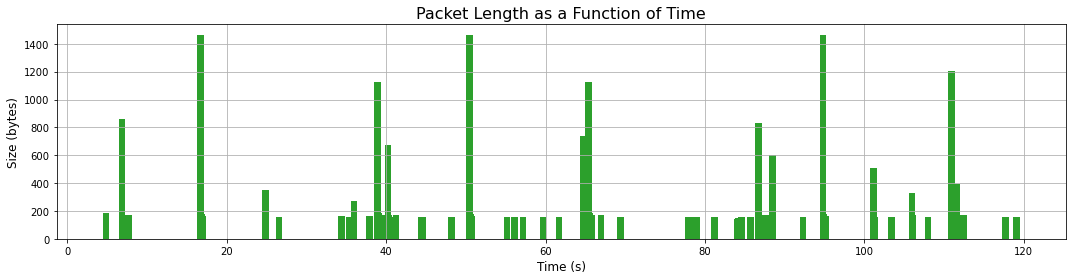

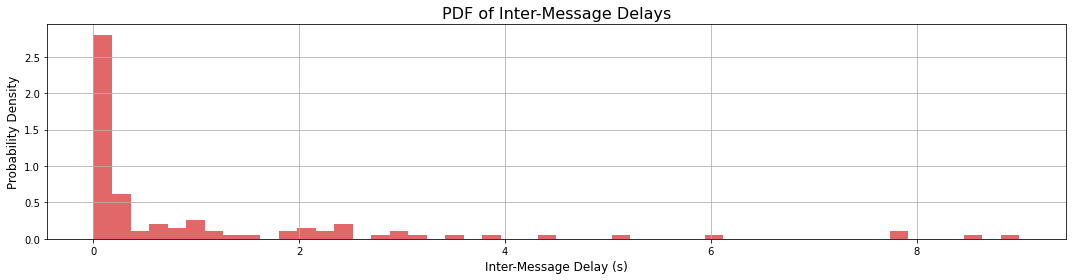

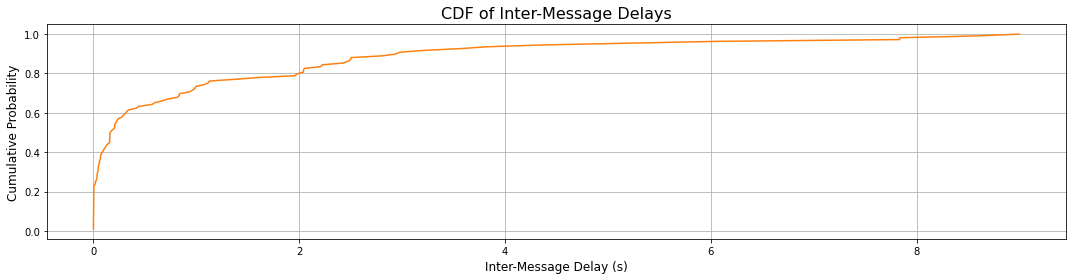

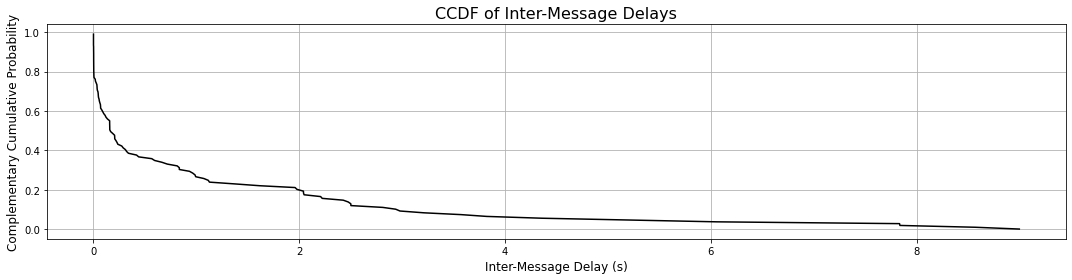

In [22]:
data = display('videoRecording.csv')

In [23]:
data.describe()

,No.,Time,Length,Delay
count,110.000000,110.000000,110.000000,109.000000
mean,43576.209091,64.016122,296.918182,1.048190
std,18391.803107,32.708829,332.742817,1.863624
min,95.000000,4.823447,113.000000,0.000000
25%,51684.250000,39.385117,154.000000,0.026092
50%,51961.000000,64.691675,168.000000,0.166776
75%,52108.750000,94.814799,177.000000,1.115539
max,52337.000000,119.076162,1466.000000,8.997885


# Combining all together

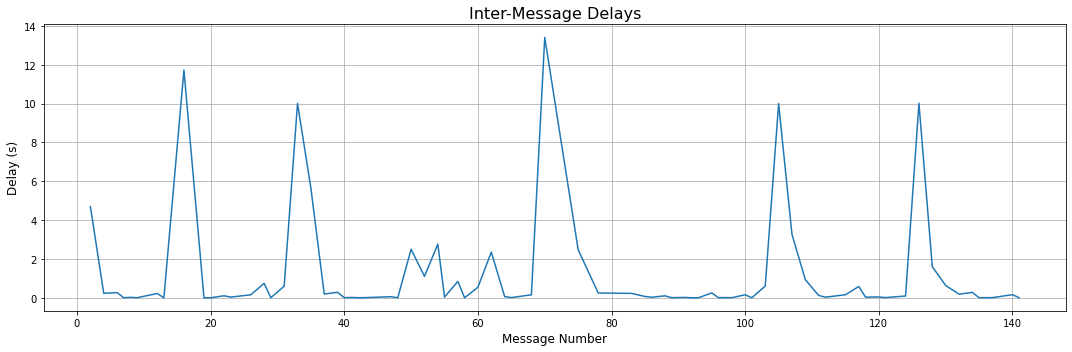

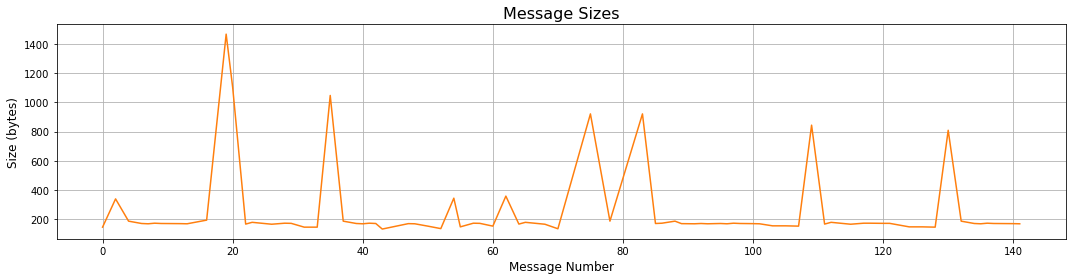

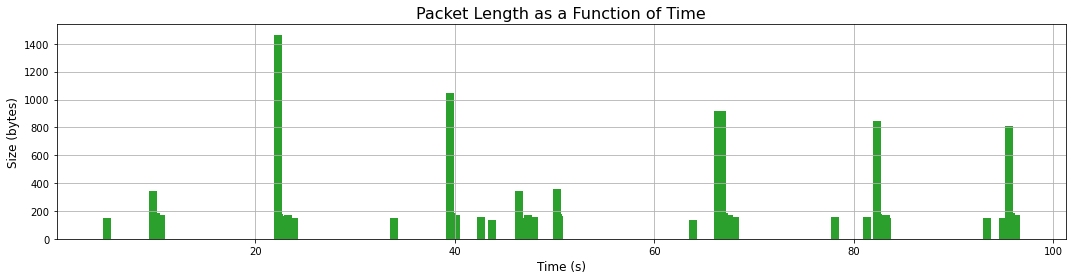

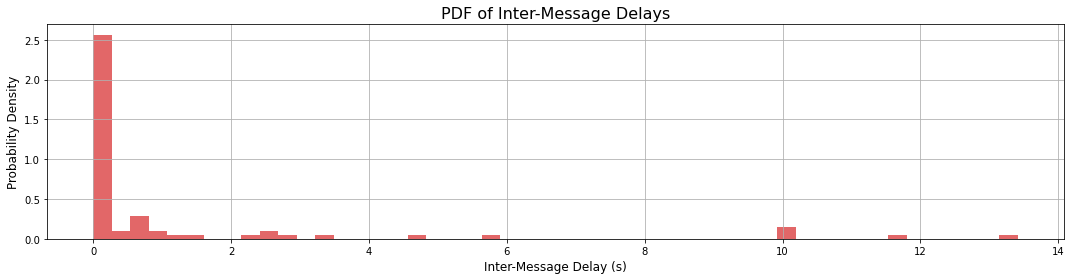

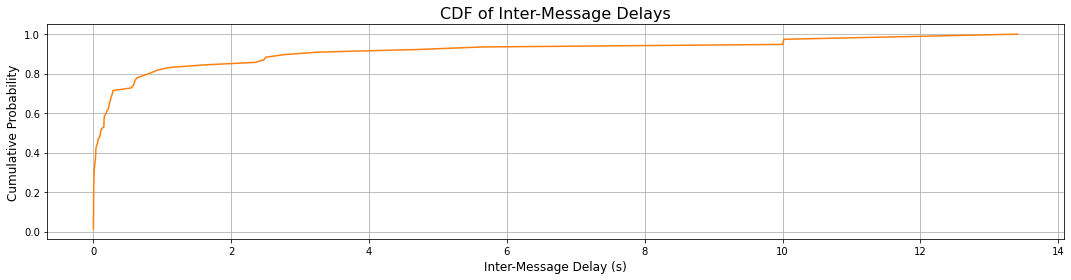

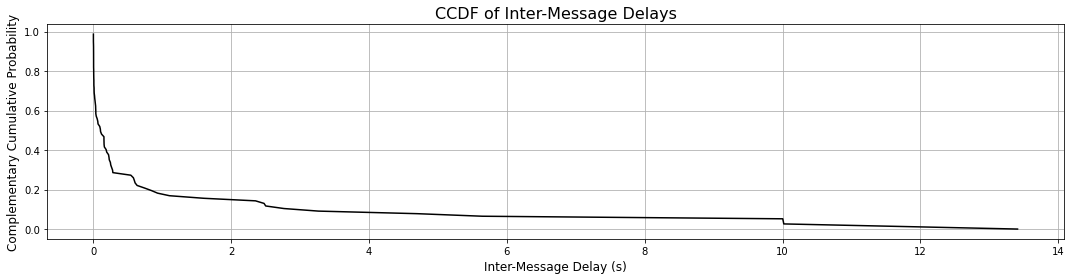

In [24]:
data = display('allTogetherRecording.csv')

In [25]:
data.describe()

,No.,Time,Length,Delay
count,78.000000,78.000000,78.000000,77.000000
mean,1054.923077,54.816924,251.076923,1.183736
std,559.256551,27.533669,252.347357,2.829878
min,36.000000,5.093353,134.000000,0.000000
25%,891.000000,39.596139,168.000000,0.006671
50%,1105.500000,57.186279,172.000000,0.104104
75%,1413.750000,80.540090,174.000000,0.593303
max,1933.000000,96.241032,1466.000000,13.409593


# Adding noise to the data

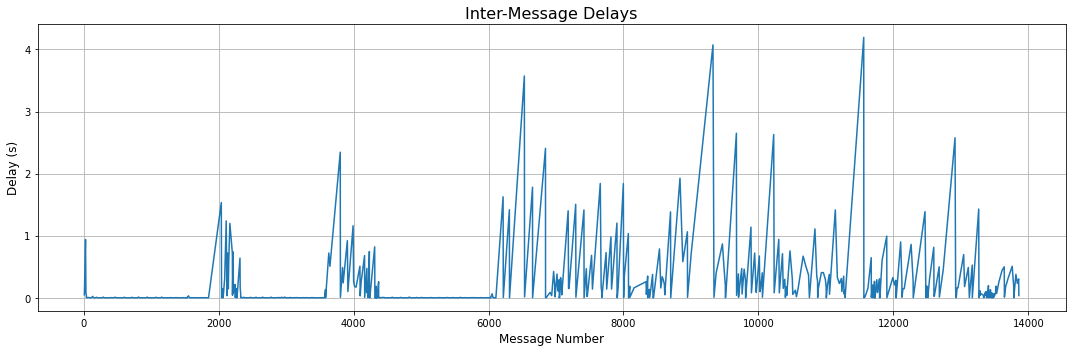

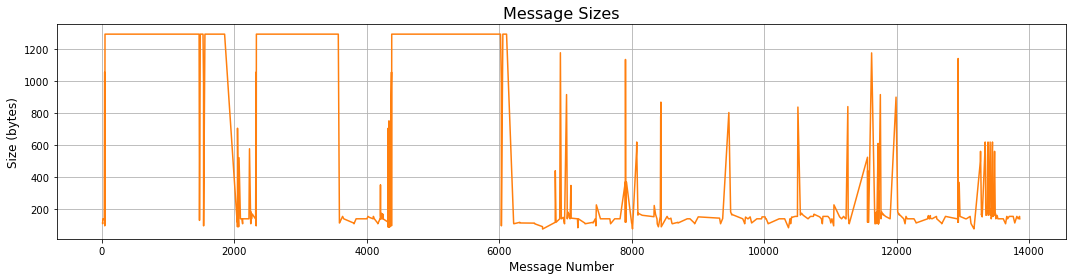

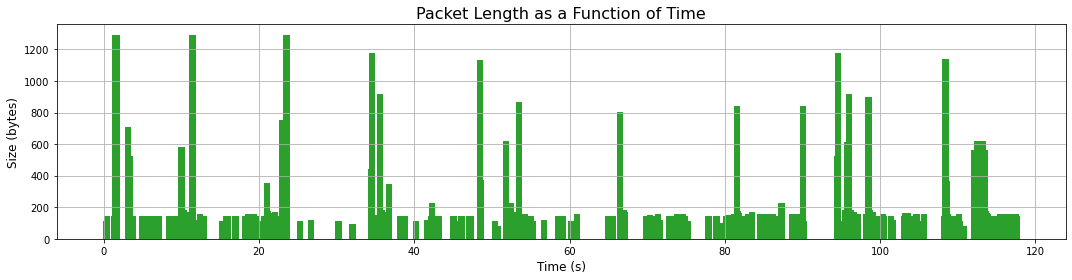

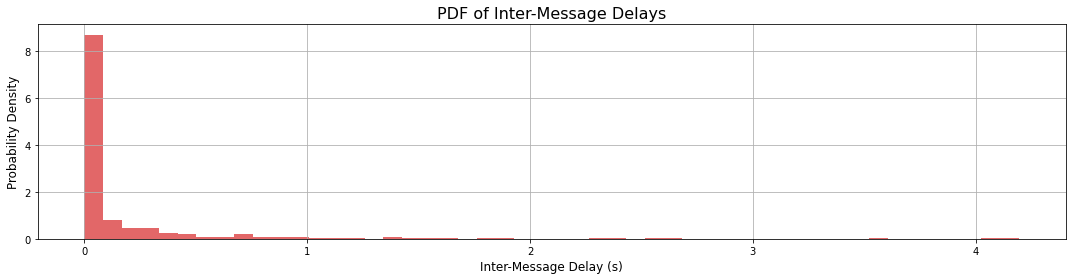

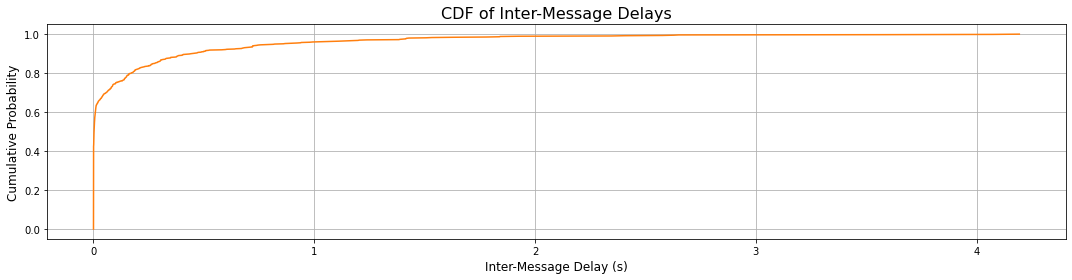

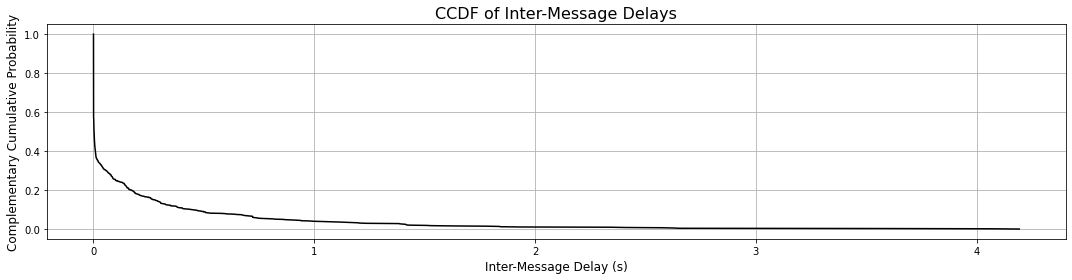

In [26]:
data = display('noiseRecording.csv')

In [27]:
data.describe()

,No.,Time,Length,Delay
count,749.000000,749.000000,749.000000,748.000000
mean,6107.845127,40.036577,701.061415,0.156918
std,4211.015765,38.352897,557.798402,0.424664
min,9.000000,0.232446,78.000000,0.000000
25%,2513.000000,11.447031,142.000000,0.000017
50%,5107.000000,23.488040,563.000000,0.002517
75%,9811.000000,71.668798,1294.000000,0.100616
max,13860.000000,117.607234,1294.000000,4.193864


## Introduction code


In [28]:
data = pd.read_csv('newRecord1.csv')
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,0.737911,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data
1,3,0.807164,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TCP,74,443 > 52750 [ACK] Seq=1 Ack=71 Win=1141 Len=0
2,145,7.809421,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data
3,146,7.877545,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TCP,74,443 > 52750 [ACK] Seq=1 Ack=141 Win=1141 Len=0
4,207,9.292341,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,1059,Application Data
...,...,...,...,...,...,...,...
59,373,41.701212,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TCP,74,55177 > 443 [ACK] Seq=2 Ack=41 Win=511 Len=0
60,374,41.701464,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TCP,74,"55177 > 443 [FIN, ACK] Seq=2 Ack=41 Win=511 ..."
61,375,41.776622,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TCP,74,443 > 55177 [ACK] Seq=41 Ack=3 Win=278 Len=0
62,376,42.272604,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,154,Application Data


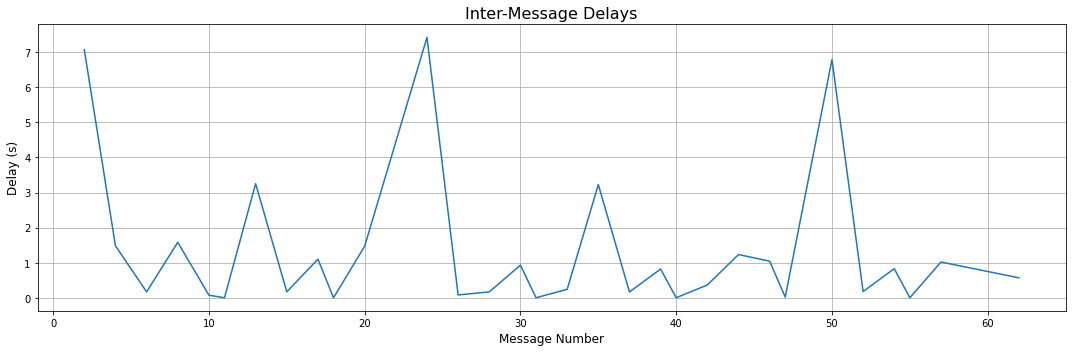

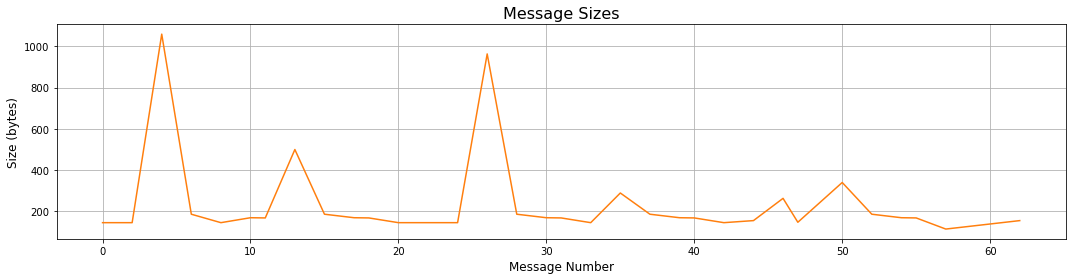

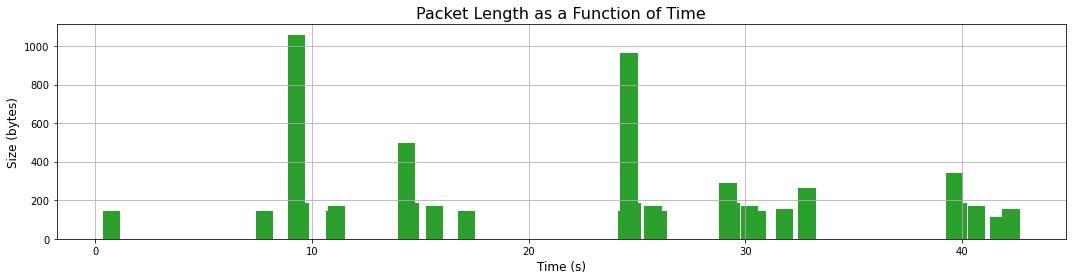

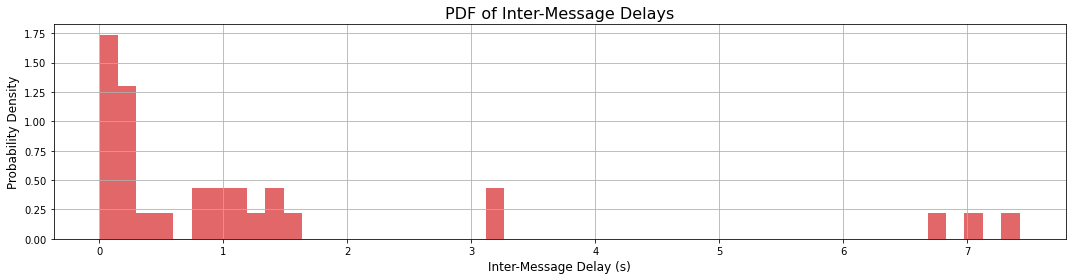

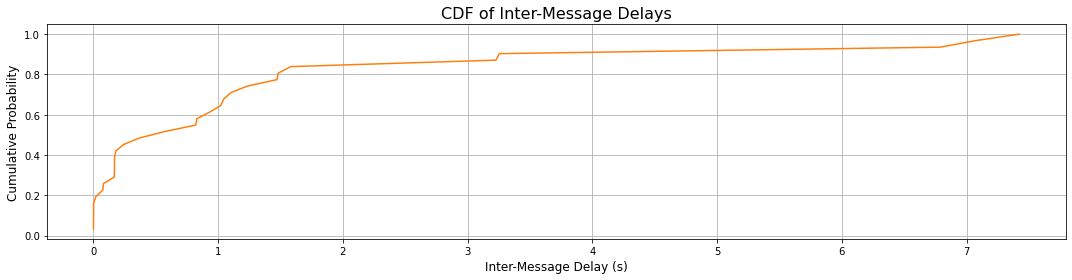

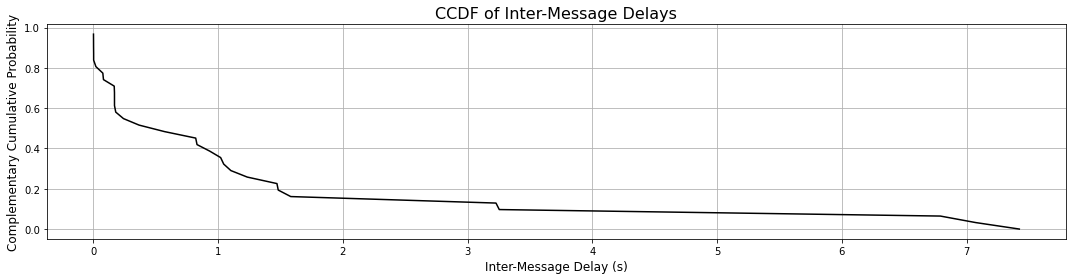

,No.,Time,Source,Destination,Protocol,Length,Info,Delay
0,2,0.737911,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,NaN
2,145,7.809421,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,7.071510
4,207,9.292341,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,1059,Application Data,1.482920
6,209,9.463018,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,185,Application Data,0.170677
8,212,11.046223,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,1.583205
10,214,11.123377,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,168,Application Data,0.077154
11,215,11.126300,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,167,Application Data,0.002923
13,221,14.380524,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,499,Application Data,3.254224
15,225,14.551144,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,185,Application Data,0.170620
17,241,15.654545,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,168,Application Data,1.103401


In [29]:
display('newRecord1.csv')

In [38]:
def display_filtered(data):
    data = data[data['Info'] == 'Application Data']
    # Calculate the inter-message delays
    data['Delay'] = data['Time'].diff()

    # Set up a consistent color palette
    color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Plot the inter-message delays
    plt.figure(figsize=(15, 5))
    plt.plot(data['Delay'], color=color_palette[0])
    plt.title('Inter-Message Delays', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Delay (s)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the message sizes
    plt.figure(figsize=(15, 4))
    plt.plot(data['Length'], color=color_palette[1])
    plt.title('Message Sizes', fontsize=16)
    plt.xlabel('Message Number', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the packet length as a function of time
    plt.figure(figsize=(15, 4))
    plt.bar(data['Time'], data['Length'], color=color_palette[2])
    plt.title('Packet Length as a Function of Time', fontsize=16)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Size (bytes)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the PDF as a function of inter-message delays in a new color
    plt.figure(figsize=(15, 4))
    plt.hist(data['Delay'].dropna(), bins=50, density=True, color=color_palette[3], alpha=0.7)
    plt.title('PDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate the CDF of inter-message delays
    delay_values = data['Delay'].dropna().values
    delay_values.sort()
    cdf = np.arange(1, len(delay_values) + 1) / len(delay_values)

    # Plot the CDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, cdf, color=color_palette[1])
    plt.title('CDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
     # Calculate the CCDF values
    ccdf = 1 - cdf

    # Plot the CCDF of inter-message delays
    plt.figure(figsize=(15, 4))
    plt.plot(delay_values, ccdf, color='black')  # Set color to black
    plt.title('CCDF of Inter-Message Delays', fontsize=16)
    plt.xlabel('Inter-Message Delay (s)', fontsize=12)
    plt.ylabel('Complementary Cumulative Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return data

In [39]:
filtered_df = data[data['Info'] == 'Application Data']
filtered_df.describe()

,No.,Time,Length
count,32.00000,32.000000,32.000000
mean,269.84375,24.418040,237.031250
std,72.57037,11.637967,215.888036
min,2.00000,0.737911,113.000000
25%,224.00000,14.508489,145.500000
50%,285.50000,25.739643,167.500000
75%,313.50000,32.069422,185.000000
max,376.00000,42.272604,1059.000000


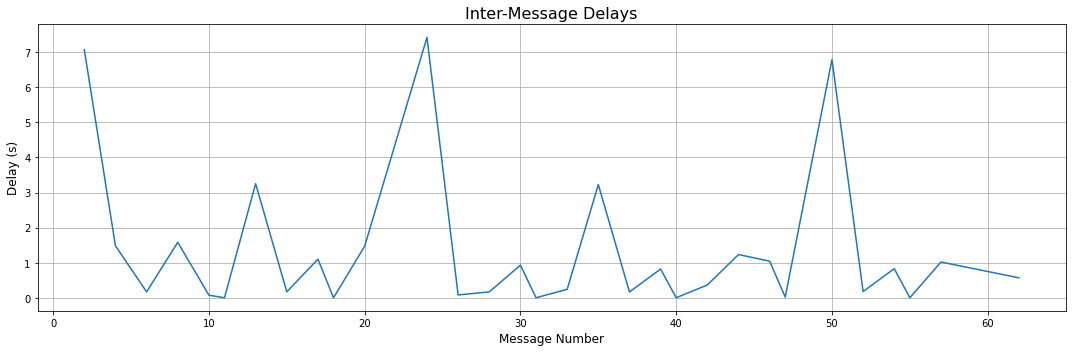

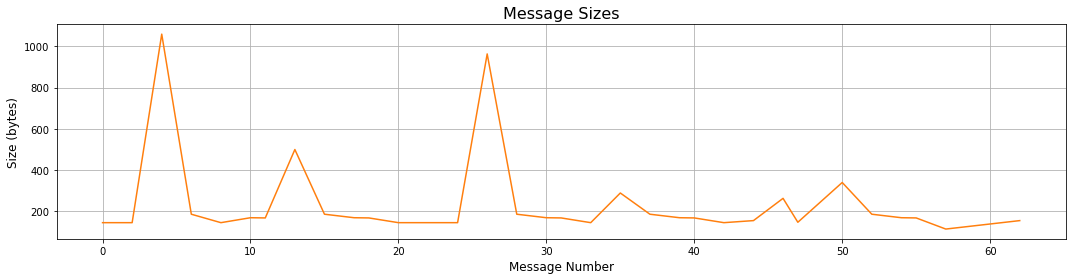

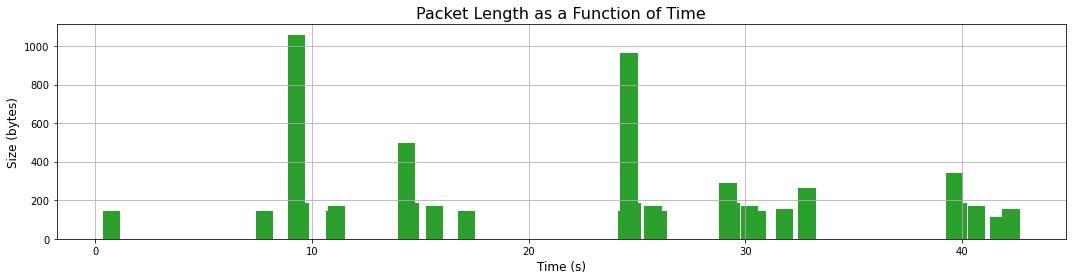

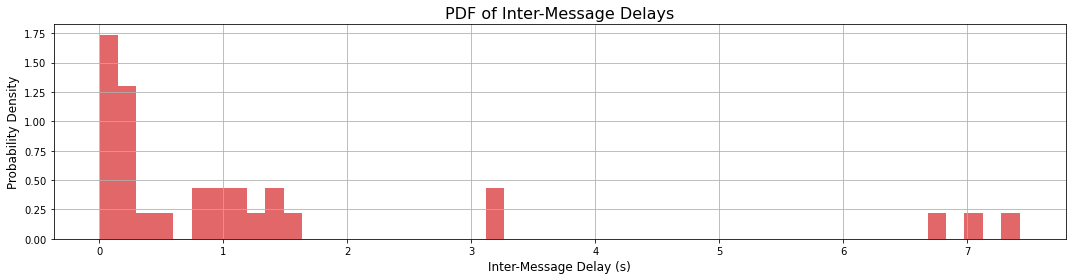

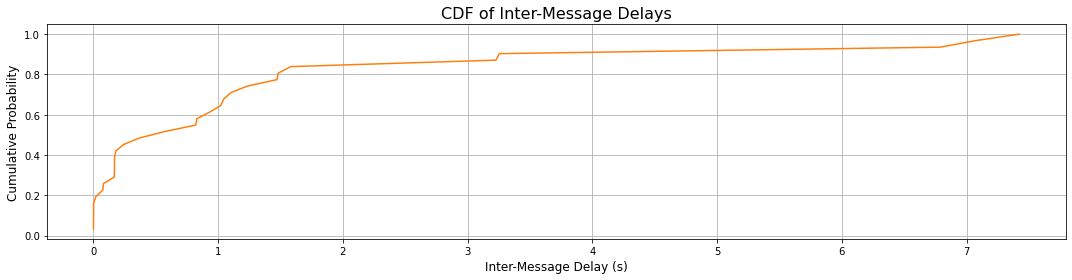

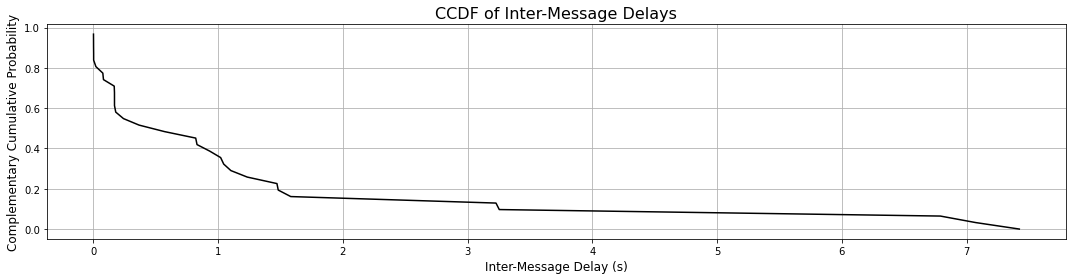

,No.,Time,Source,Destination,Protocol,Length,Info,Delay
0,2,0.737911,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,NaN
2,145,7.809421,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,7.071510
4,207,9.292341,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,1059,Application Data,1.482920
6,209,9.463018,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,185,Application Data,0.170677
8,212,11.046223,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,144,Application Data,1.583205
10,214,11.123377,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,168,Application Data,0.077154
11,215,11.126300,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,167,Application Data,0.002923
13,221,14.380524,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,2a03:2880:f276:cd:face:b00c:0:167,TLSv1.2,499,Application Data,3.254224
15,225,14.551144,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,185,Application Data,0.170620
17,241,15.654545,2a03:2880:f276:cd:face:b00c:0:167,2a0d:6fc2:5560:c200:bdce:1f2e:bc44:2269,TLSv1.2,168,Application Data,1.103401


In [40]:
display_filtered(filtered_df)